Lorena Vianey Barrón de la Torre **Mat**. 1992296 **Hora** N1 **Días** LMV
Actividad 4 - *Entrenamiento de red neuronal artificial simple*
**25 dígitos aleatorios**

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 19s 8ms/step - loss: 0.2595 - accuracy: 0.9259 - val_loss: 0.1062 - val_accuracy: 0.9600
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1133 - accuracy: 0.9658 - val_loss: 0.0367 - val_accuracy: 1.0000
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0776 - accuracy: 0.9770 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0594 - accuracy: 0.9819 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 27ms/step - loss: 0.0916 - accuracy: 0.9600
Precisión en el conjunto de prueba: 0.9599999785423279
1/1 [==============================] - 0s 93ms/step


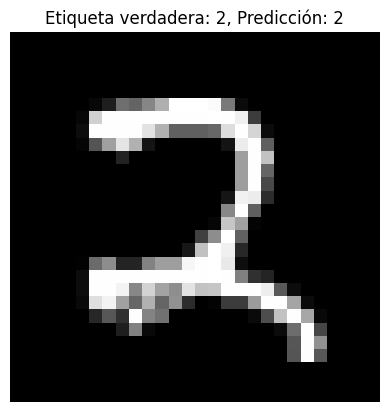

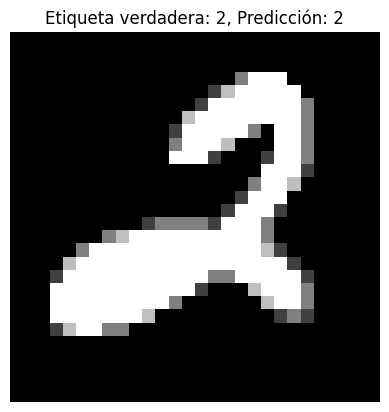

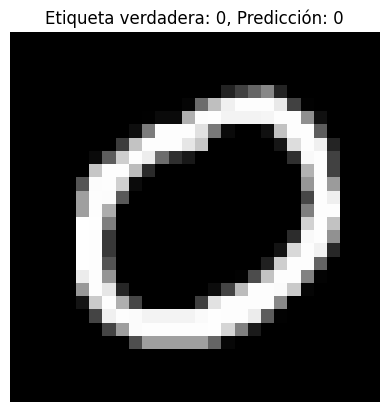

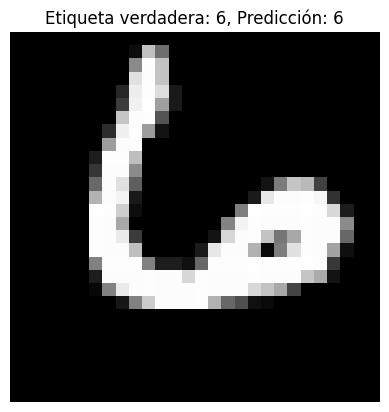

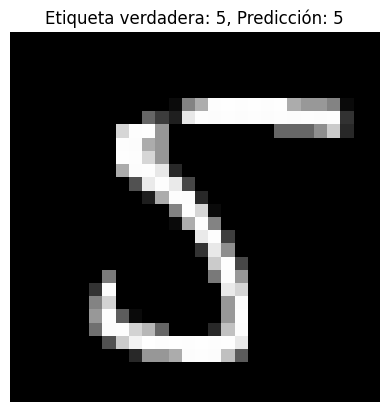

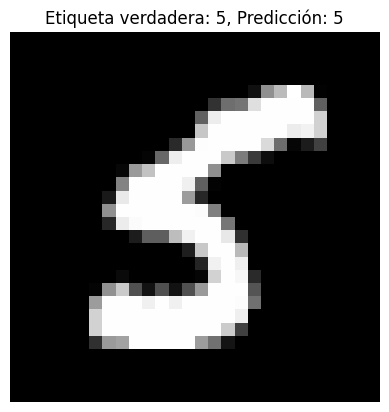

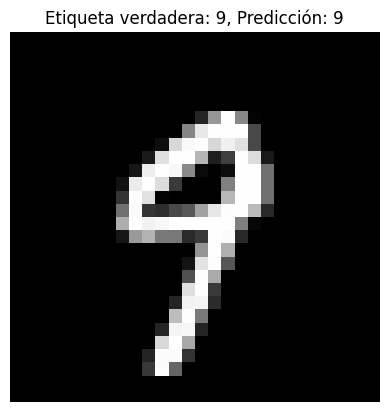

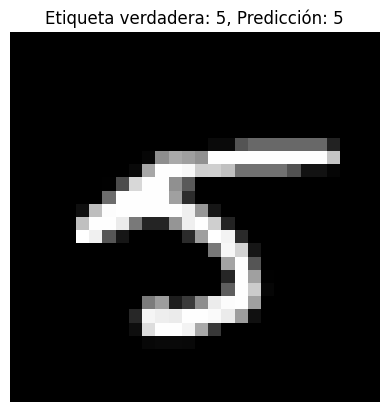

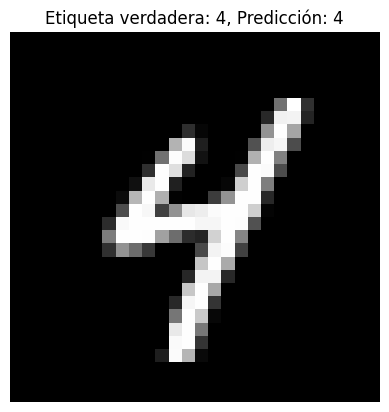

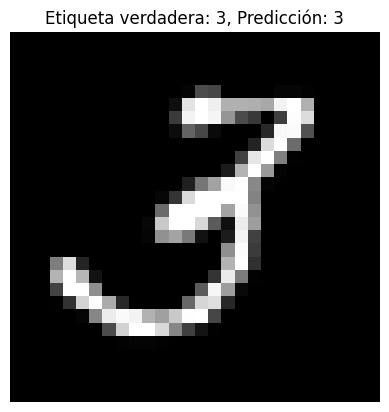

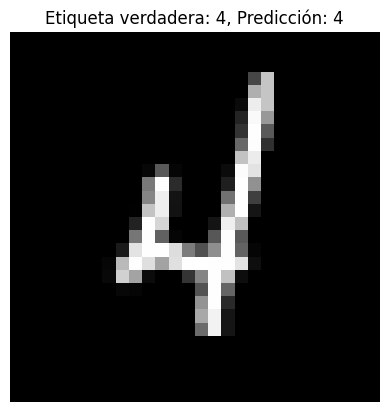

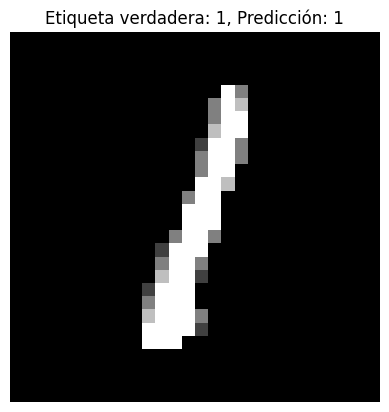

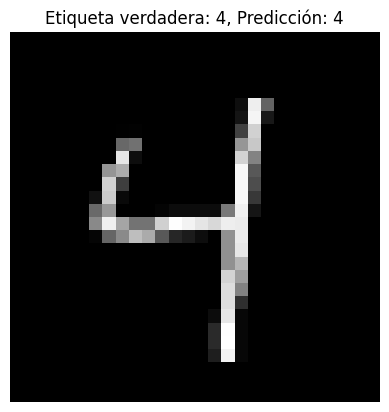

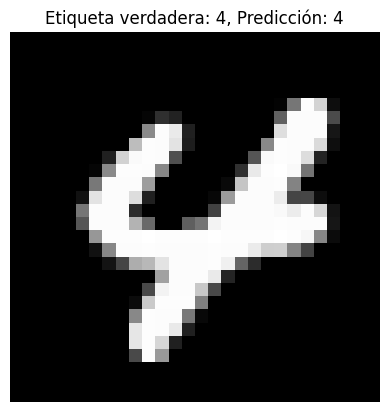

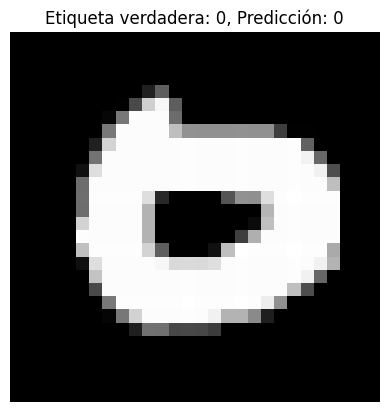

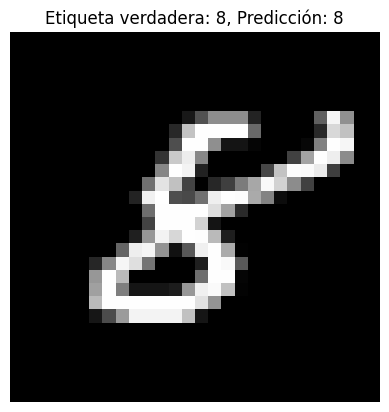

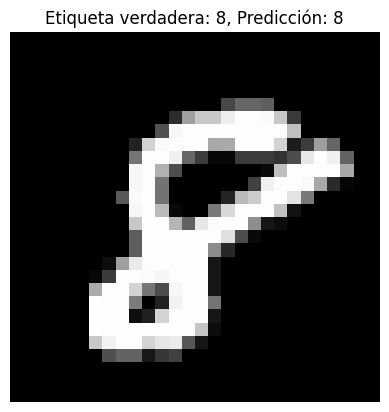

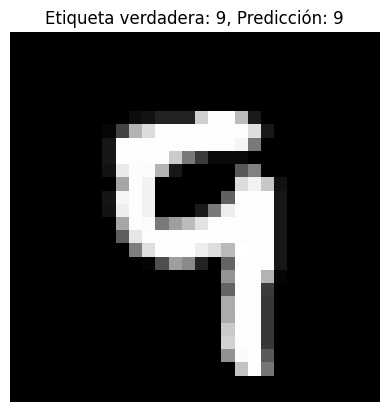

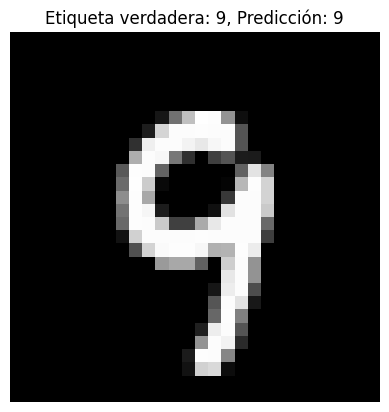

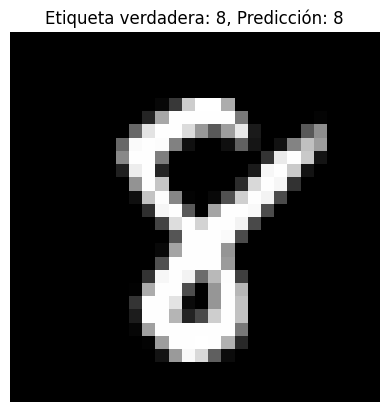

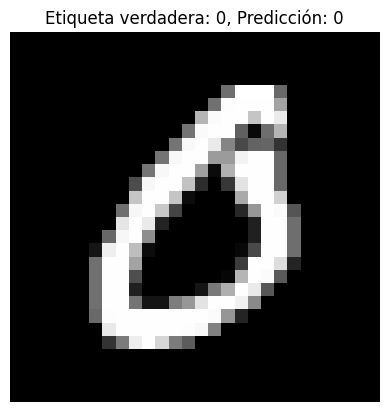

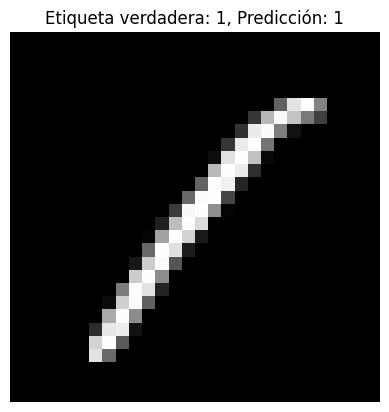

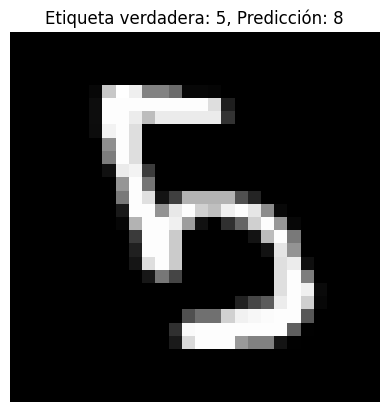

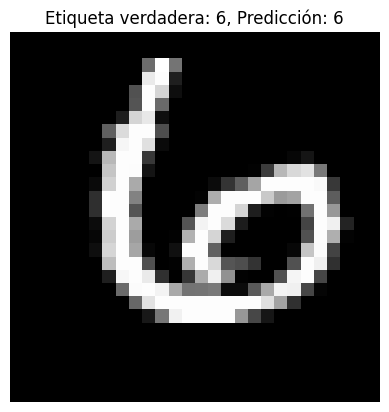

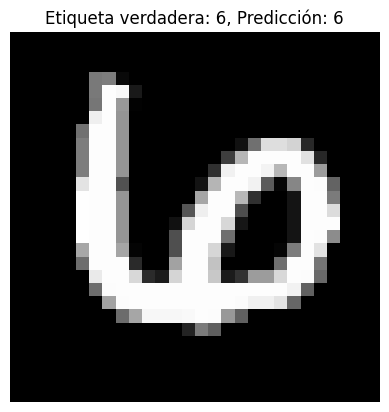

In [1]:
# Importar bibliotecas
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt

# Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocesamiento de los datos
x_train = x_train / 255.0
x_test = x_test / 255.0

# Filtrar y seleccionar 25 dígitos escritos a mano
random_indices = np.random.choice(len(x_test), size=25, replace=False)
x_test_sample = x_test[random_indices]
y_test_sample = y_test[random_indices]

# Construir el modelo de la red neuronal
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo - Aquí se ajustan los pesos de las entradas de todas las neuronas
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test_sample, y_test_sample))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test_sample, y_test_sample)
print('Precisión en el conjunto de prueba:', test_acc)

# Mostrar las imágenes y las predicciones - Aquí se muestran los dígitos aleatorios y la efectividad de la predicción
predictions = model.predict(x_test_sample)
for i in range(len(x_test_sample)):
    plt.imshow(x_test_sample[i], cmap='gray')
    plt.title(f'Etiqueta verdadera: {y_test_sample[i]}, Predicción: {np.argmax(predictions[i])}')
    plt.axis('off')
    plt.show()
